# Proyek Pertama : Membuat Model NLP dengan Tensorflow

Andreas Natanael Bunyamin \\
andreasbunyamin@gmail.com


Pada proyek ini saya akan mengimplementasikan NLP untuk memprediksi kategori berita berdasarkan judulnya. Dataset yang saya gunakan adalah "[News Category Dataset](https://www.kaggle.com/datasets/rmisra/news-category-dataset/data)" yang diambil dari kaggle.

In [1]:
import pandas as pd
import re

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d rmisra/news-category-dataset

100% 26.5M/26.5M [00:01<00:00, 28.6MB/s]
100% 26.5M/26.5M [00:01<00:00, 16.7MB/s]


In [4]:
!unzip /content/news-category-dataset.zip

Archive:  /content/news-category-dataset.zip
  inflating: News_Category_Dataset_v3.json  


In [5]:
df = pd.read_json ("News_Category_Dataset_v3.json", lines = True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [6]:
#Mengambil kolom headline dan category
df = df.loc[:, ['headline', 'category']]
df

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS
...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS


In [7]:
#Menampilkan kategori berdasarkan jumlah berita
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [8]:
#Mengambil 3 kategori terbanyak untuk training
df = df[df['category'].isin(['POLITICS','WELLNESS','ENTERTAINMENT'])]
df['category'].value_counts()

POLITICS         35602
WELLNESS         17945
ENTERTAINMENT    17362
Name: category, dtype: int64

In [11]:
#One Hot Encoding
category = pd.get_dummies(df.category)
df_category = pd.concat([df, category], axis=1)
df_category = df_category.drop(columns='category')
df_category.head()

,headline,ENTERTAINMENT,POLITICS,WELLNESS
20,Golden Globes Returning To NBC In January Afte...,1,0,0
21,Biden Says U S Forces Would Defend Taiwan If C...,0,1,0
24,Beautiful And Sad At The Same Time Ukrainian ...,0,1,0
28,James Cameron Says He Clashed With Studio Befo...,1,0,0
30,Biden Says Queen s Death Left Giant Hole For R...,0,1,0


In [12]:
# Mengubah tipe data menjadi str dan numpy array
title = df_category['headline'].astype(str)
label = df_category[['POLITICS','WELLNESS','ENTERTAINMENT']].values

In [13]:
#Data split 80:20
title_train, title_test, label_train, label_test = train_test_split(title, label, test_size = 0.2)

In [14]:
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(title_train)
tokenizer.fit_on_texts(title_test)

train_sequences = tokenizer.texts_to_sequences(title_train)
test_sequences = tokenizer.texts_to_sequences(title_test)

padded_train = pad_sequences(train_sequences, maxlen=32, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen=32, padding='post', truncating='post')

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      print("\nAkurasi train dan validasi didapat telah mencapai nilai > 95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [30]:
num_epochs = 10
history = model.fit(padded_train, label_train,
                    epochs=num_epochs,
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/10
1773/1773 - 35s - loss: 0.1385 - accuracy: 0.9555 - val_loss: 0.2379 - val_accuracy: 0.9211 - 35s/epoch - 20ms/step
Epoch 2/10
1773/1773 - 34s - loss: 0.1227 - accuracy: 0.9600 - val_loss: 0.2480 - val_accuracy: 0.9203 - 34s/epoch - 19ms/step
Epoch 3/10
1773/1773 - 35s - loss: 0.1080 - accuracy: 0.9650 - val_loss: 0.2655 - val_accuracy: 0.9181 - 35s/epoch - 20ms/step
Epoch 4/10
1773/1773 - 39s - loss: 0.0952 - accuracy: 0.9684 - val_loss: 0.3072 - val_accuracy: 0.9193 - 39s/epoch - 22ms/step
Epoch 5/10
1773/1773 - 33s - loss: 0.0843 - accuracy: 0.9714 - val_loss: 0.3382 - val_accuracy: 0.9153 - 33s/epoch - 19ms/step
Epoch 6/10
1773/1773 - 34s - loss: 0.0752 - accuracy: 0.9750 - val_loss: 0.3729 - val_accuracy: 0.9130 - 34s/epoch - 19ms/step
Epoch 7/10
1773/1773 - 33s - loss: 0.0675 - accuracy: 0.9772 - val_loss: 0.3379 - val_accuracy: 0.9116 - 33s/epoch - 18ms/step
Epoch 8/10
1773/1773 - 32s - loss: 0.0607 - accuracy: 0.9793 - val_loss: 0.4251 - val_accuracy: 0.9109 - 32s/ep

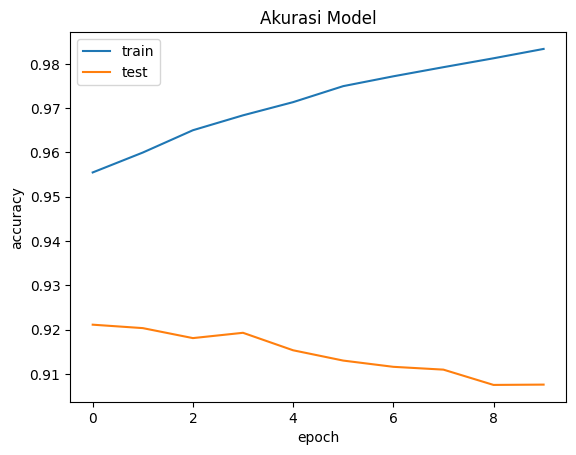

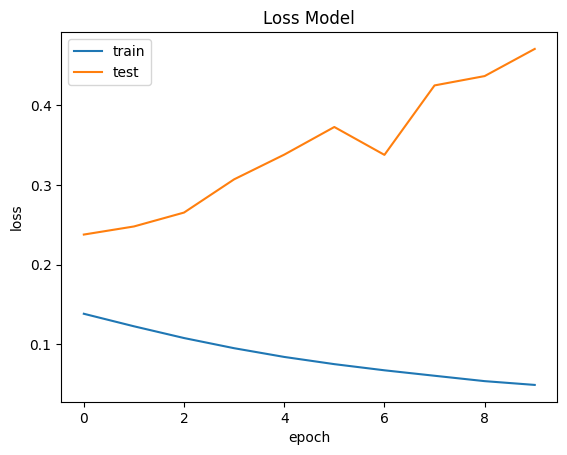

In [31]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()